In [190]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import os

from readability import Readability

In [191]:
current_dir = Path(os.getcwd())
path_to_data = os.path.join(current_dir.parent.parent, 'data')
path_to_data

'c:\\Users\\DELL Admin\\Documents\\ODC\\RegenRangers\\data'

In [192]:
df_grants = pd.read_csv(os.path.join(path_to_data, 'Beta-applicants-projects.csv'))

In [193]:
df_grants.columns

Index(['id', 'projectNumber', 'roundId', 'status', 'amountUSD', 'votes',
       'uniqueContributors', 'payoutAddress', 'metadata.signature',
       'metadata.application.round', 'metadata.application.recipient',
       'metadata.application.project.lastUpdated',
       'metadata.application.project.createdAt',
       'metadata.application.project.id', 'metadata.application.project.title',
       'metadata.application.project.description',
       'metadata.application.project.website',
       'metadata.application.project.bannerImg',
       'metadata.application.project.logoImg',
       'metadata.application.project.metaPtr.protocol',
       'metadata.application.project.metaPtr.pointer',
       'metadata.application.project.userGithub',
       'metadata.application.project.projectGithub',
       'metadata.application.project.projectTwitter',
       'metadata.application.project.credentials.twitter.@context',
       'metadata.application.project.credentials.twitter.type',
       'metada

In [194]:
df_grants.shape

(538, 53)

In [195]:
df_grants.head()

id  projectNumber   
0  0x6aeb3ddab061203d32594b03901bf458679a66fbeab9...          355.0  \
1  0xdeffc2d190ddec88d06ba86e1eb09abe5a9ccb49ab1d...          174.0   
2  0x2f4109ec6cfc94018aba83b965d4debe69381b9e86c9...          291.0   
3  0xfea4b1dccc14b6b2d06d08ec300222497194f0f95437...          307.0   
4  0x6240733cbc0b059b43031826f606ee20ad649694e473...          340.0   

                                      roundId   status  amountUSD  votes   
0  0x12BB5bBbFE596dbc489d209299B8302c3300fa40  PENDING          0      0  \
1  0x12BB5bBbFE596dbc489d209299B8302c3300fa40  PENDING          0      0   
2  0x12BB5bBbFE596dbc489d209299B8302c3300fa40  PENDING          0      0   
3  0x12BB5bBbFE596dbc489d209299B8302c3300fa40  PENDING          0      0   
4  0x12BB5bBbFE596dbc489d209299B8302c3300fa40  PENDING          0      0   

   uniqueContributors  payoutAddress   
0                   0            NaN  \
1                   0            NaN   
2                   0            NaN   
3                   0            NaN   
4                   0            NaN   

                                  metadata.signature   
0  0x4c3db176694bdfc0f9e4a04738205d562ef31a026699...  \
1  0xc9f5e29fcb4db0b0c9a5909f68c162ea5d16a275f705...   
2  0x0d5b170ceeb72eaec00a595f8270a676937acbeb67b9...   
3  0x32a6db08937189778a4fee954a738ad534598a1fc113...   
4  0xa8445a15122bb07f1daaad049f50dc52107540547cd5...   

                   metadata.application.round  ...   
0  0x12bb5bbbfe596dbc489d209299b8302c3300fa40  ...  \
1  0x12bb5bbbfe596dbc489d209299b8302c3300fa40  ...   
2  0x12bb5bbbfe596dbc489d209299b8302c3300fa40  ...   
3  0x12bb5bbbfe596dbc489d209299b8302c3300fa40  ...   
4  0x12bb5bbbfe596dbc489d209299b8302c3300fa40  ...   

  metadata.application.project.credentials.github.credentialSubject.@context   
0  [{'hash': 'https://schema.org/Text', 'provider...                          \
1  [{'hash': 'https://schema.org/Text', 'provider...                           
2  [{'hash': 'https://schema.org/Text', 'provider...                           
3  [{'hash': 'https://schema.org/Text', 'provider...                           
4  [{'hash': 'https://schema.org/Text', 'provider...                           

  metadata.application.project.credentials.github.issuer   
0  did:key:z6MkghvGHLobLEdj1bgRLhS4LPGJAvbMA1tn2z...      \
1  did:key:z6MkghvGHLobLEdj1bgRLhS4LPGJAvbMA1tn2z...       
2  did:key:z6MkghvGHLobLEdj1bgRLhS4LPGJAvbMA1tn2z...       
3  did:key:z6MkghvGHLobLEdj1bgRLhS4LPGJAvbMA1tn2z...       
4  did:key:z6MkghvGHLobLEdj1bgRLhS4LPGJAvbMA1tn2z...       

   metadata.application.project.credentials.github.issuanceDate   
0                           2023-04-12T09:48:40.402Z             \
1                           2023-01-13T08:12:23.363Z              
2                           2023-04-12T19:34:27.203Z              
3                           2023-04-12T20:30:12.252Z              
4                           2023-04-12T21:36:13.514Z              

  metadata.application.project.credentials.github.proof.type   
0                               Ed25519Signature2018          \
1                               Ed25519Signature2018           
2                               Ed25519Signature2018           
3                               Ed25519Signature2018           
4                               Ed25519Signature2018           

  metadata.application.project.credentials.github.proof.proofPurpose   
0                                    assertionMethod                  \
1                                    assertionMethod                   
2                                    assertionMethod                   
3                                    assertionMethod                   
4                                    assertionMethod                   

  metadata.application.project.credentials.github.proof.verificationMethod   
0  did:key:z6MkghvGHLobLEdj1bgRLhS4LPGJAvbMA1tn2z...                        \
1  did:key:z6MkghvGHLobLEdj1bgRLhS4LPGJAvbMA

In [196]:
df_grants['metadata.application.project.description'].head()

0    [DAOstar](https://daostar.org) is the standard...
1    # We show you how to manage and monetize your ...
2    # Aurellion: Decentralized Shipping Platform\n...
3    beaconcha.in is an open source explorer that p...
4    xLog is the best on-chain and open-source blog...
Name: metadata.application.project.description, dtype: object

In [197]:
df_grants['metadata.application.project.description'][0]

"[DAOstar](https://daostar.org) is the standards body of the DAO ecosystem, composed of over 80 key organizations in the space including every major DAO framework, a large number of DAO tooling companies, and many major DAOs. We're the IETF of DAOs.\n\nWe authored and maintain [EIP-4824 / DAOIP-2: Common Interfaces for DAOs](https://eips.ethereum.org/EIPS/eip-4824), along with [many other standards](https://github.com/metagov/daostar/tree/main/DAOIPs) already published and in development. You can participate in the [working groups](https://daostar.one/), or start contributing to our [discussion forum](https://github.com/metagov/daostar/discussions).\n\nHelp us shape the future of DAOs!"

In [198]:
def flesch_kincaid(r):
    try:
        return r.flesch_kincaid().score
    except:
        return np.nan

def flesch(r):
    try:
        return r.flesch().score
    except:
        return np.nan

def gunning_fog(r):
    try:
        return r.gunning_fog().score
    except:
        return np.nan

def coleman_liau(r):
    try:
        return r.coleman_liau().score
    except:
        return np.nan

def dale_chall(r):
    try:
        return r.dale_chall().score
    except:
        return np.nan

def ari(r):
    try:
        return r.ari().score
    except:
        return np.nan

def linsear_write(r):
    try:
        return r.linsear_write().score
    except:
        return np.nan

def smog(r):
    try:
        return r.smog().score
    except:
        return np.nan

def spache(r):
    try:
        return r.spache().score
    except:
        return np.nan


In [199]:
def flesch_kincaid_grade(r):
    try:
        return r.flesch_kincaid().grade_level
    except:
        return np.nan

def flesch_grade(r):
    try:
        return r.flesch().grade_levels[0]
    except:
        return np.nan

def gunning_fog_grade(r):
    try:
        return r.gunning_fog().grade_level
    except:
        return np.nan

def coleman_liau_grade(r):
    try:
        return r.coleman_liau().grade_level
    except:
        return np.nan

def dale_chall_grade(r):
    try:
        return r.dale_chall().grade_levels[0]
    except:
        return np.nan

def ari_grade(r):
    try:
        return r.ari().grade_levels[0]
    except:
        return np.nan

def linsear_write_grade(r):
    try:
        return r.linsear_write().grade_level
    except:
        return np.nan

def smog_grade(r):
    try:
        return r.smog().grade_levels[0]
    except:
        return np.nan

def spache_grade(r):
    try:
        return r.spache().grade_level
    except:
        return np.nan


In [200]:
df_grants['readability'] = df_grants['metadata.application.project.description'].apply(lambda x: Readability(x))

In [201]:
df_grants['flesch_kincaid'] = df_grants['readability'].apply(flesch_kincaid)
df_grants['flesch_kincaid_grade'] = df_grants['readability'].apply(flesch_kincaid_grade)
df_grants['flesch'] = df_grants['readability'].apply(flesch)
df_grants['flesch_grade'] = df_grants['readability'].apply(flesch_grade)
df_grants['gunning_fog'] =  df_grants['readability'].apply(gunning_fog)
df_grants['gunning_fog_grade'] = df_grants['readability'].apply(gunning_fog_grade)
df_grants['coleman_liau'] = df_grants['readability'].apply(coleman_liau)
df_grants['coleman_liau_grade'] = df_grants['readability'].apply(coleman_liau_grade)
df_grants['dale_chall'] = df_grants['readability'].apply(dale_chall)
df_grants['dale_chall_grade'] = df_grants['readability'].apply(dale_chall_grade)
df_grants['ari'] = df_grants['readability'].apply(ari)
df_grants['ari_grade'] = df_grants['readability'].apply(ari_grade)
df_grants['linsear_write'] =   df_grants['readability'].apply(linsear_write)
df_grants['linsear_write_grade'] = df_grants['readability'].apply(linsear_write_grade)
df_grants['smog'] = df_grants['readability'].apply(smog)
df_grants['smog_grade'] = df_grants['readability'].apply(smog_grade)
df_grants['spache'] = df_grants['readability'].apply(spache)
df_grants['spache_grade'] = df_grants['readability'].apply(spache_grade)

In [202]:
scores = ['flesch_kincaid', 'flesch', 'gunning_fog', 'coleman_liau', 'dale_chall', 'ari', 'linsear_write', 'smog', 'spache']
grades = ['flesch_kincaid_grade', 'flesch_grade', 'gunning_fog_grade', 'coleman_liau_grade', 'dale_chall_grade', 'ari_grade', 'linsear_write_grade', 'smog_grade', 'spache_grade']
df_grants[scores].describe()

flesch_kincaid      flesch  gunning_fog  coleman_liau  dale_chall   
count      442.000000  442.000000   442.000000    442.000000  442.000000  \
mean        14.600468   28.593035    15.593877     16.266504   11.769521   
std          4.637483   20.087574     4.505073      4.578988    1.504811   
min          7.014481 -136.882619     7.029650      7.325664    8.565106   
25%         12.008480   19.597089    13.242253     13.514024   10.934288   
50%         14.162302   30.827930    14.886973     15.480979   11.598848   
75%         16.371964   40.921878    17.569448     18.004985   12.483144   
max         61.280952   71.837576    56.225641     40.345489   20.542793   

              ari  linsear_write        smog      spache  
count  442.000000     442.000000  137.000000  442.000000  
mean    16.613712      15.996551   15.135642    8.463739  
std      6.453097       7.893471    2.176728    1.627571  
min      6.417059       4.620690    9.807559    5.531486  
25%     12.796675      12.220312   13.816670    7.597625  
50%     15.813371      14.832329   14.975303    8.227665  
75%     19.364371      18.215127   16.688100    9.058601  
max     79.892766     101.333333   20.798641   24.704143

Lets normalize the readabilty scores

In [203]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_grants[scores] = scaler.fit_transform(df_grants[scores])

In [204]:
df_grants[grades].dtypes

flesch_kincaid_grade     object
flesch_grade             object
gunning_fog_grade        object
coleman_liau_grade       object
dale_chall_grade         object
ari_grade                object
linsear_write_grade      object
smog_grade              float64
spache_grade             object
dtype: object

In [205]:
df_grants[grades].describe()

smog_grade
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

In [206]:
# remove columns with all null values
new_grades = df_grants[grades].columns[df_grants[grades].isnull().sum() != df_grants.shape[0]].to_list()
new_grades

['flesch_kincaid_grade',
 'flesch_grade',
 'gunning_fog_grade',
 'coleman_liau_grade',
 'dale_chall_grade',
 'ari_grade',
 'linsear_write_grade',
 'spache_grade']

In [207]:
df_grants[new_grades].describe()

flesch_kincaid_grade      flesch_grade gunning_fog_grade   
count                   442               442               442  \
unique                   20                 5                 8   
top                      15  college_graduate           college   
freq                     67               215               209   

       coleman_liau_grade  dale_chall_grade         ari_grade   
count                 442               442               442  \
unique                 26                 3                 8   
top                    15  college_graduate  college_graduate   
freq                   60               404               326   

       linsear_write_grade spache_grade  
count                  442          442  
unique                  33            9  
top                     13            8  
freq                    56          176

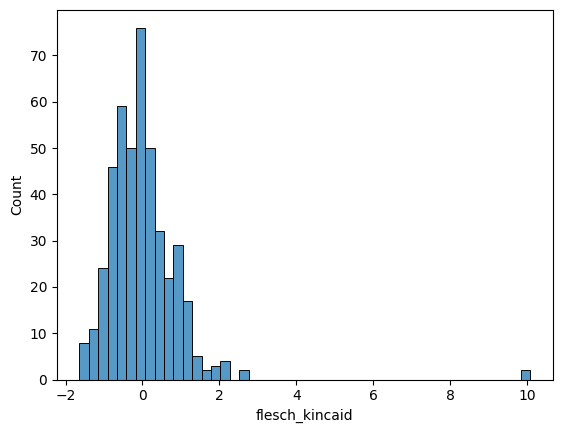

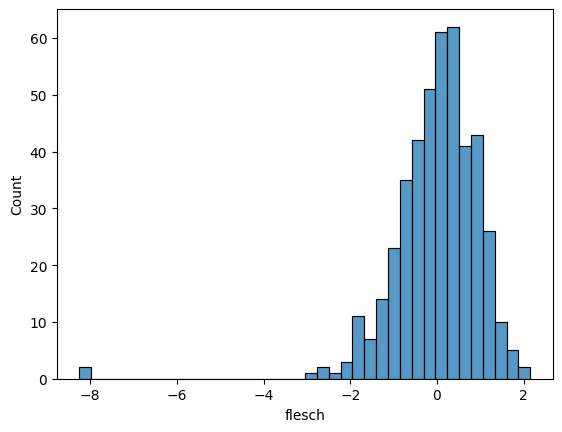

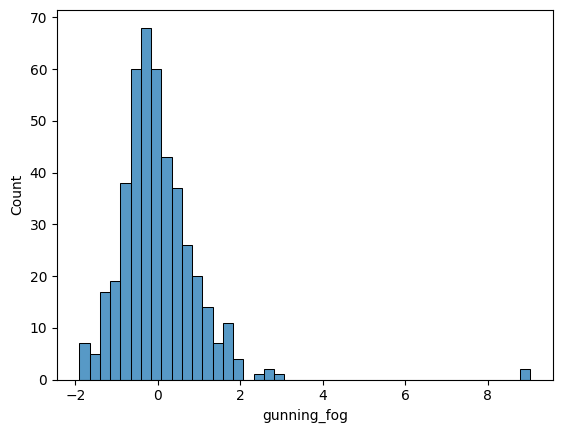

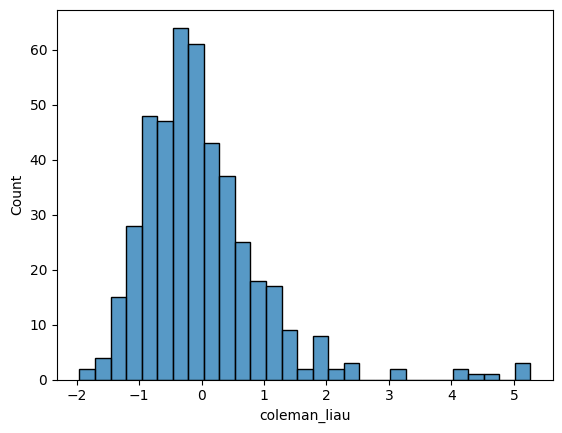

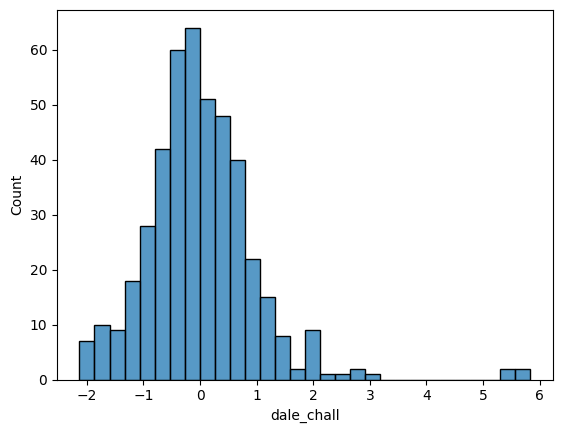

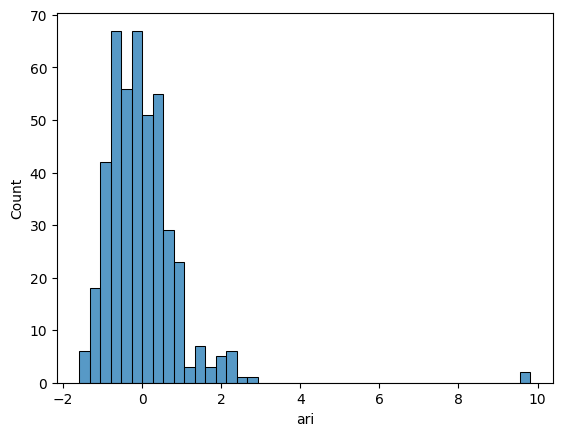

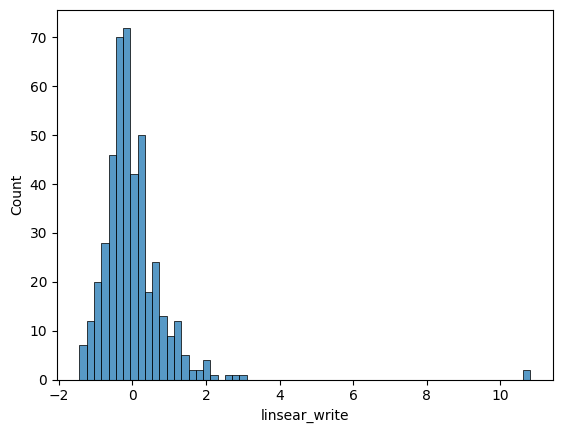

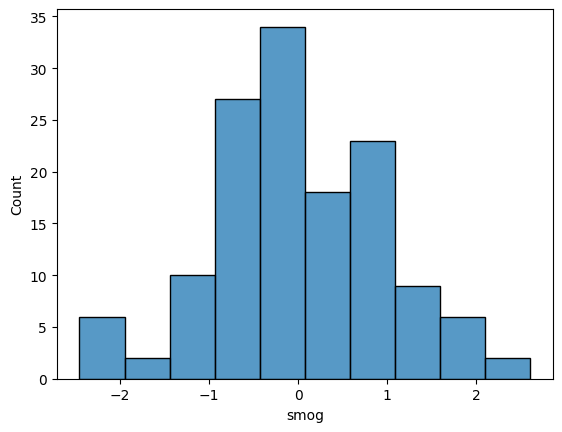

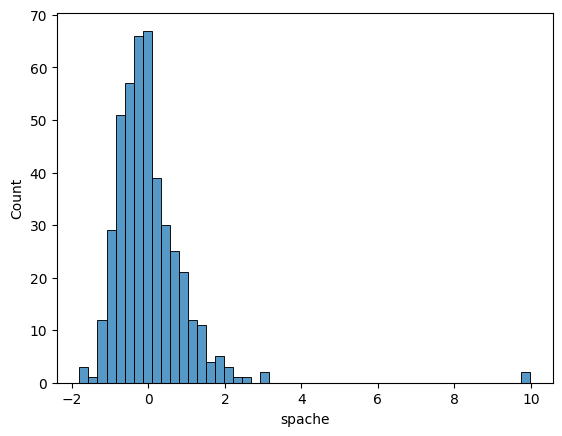

In [208]:
from matplotlib import pyplot as plt
for metric in scores:
    plt.figure()
    sns.histplot(df_grants[metric].dropna())

These metrics have a gaussian distribution thus we try to look at outliers to see which grants are the most difficult to read.

In [209]:
# for metric in grades:
#     plt.figure()
#     sns.histplot(df_grants[metric].dropna())